## BigMart Sales EDA,Sales prediction

In [1]:
import numpy as np
import sklearn.preprocessing as pp
import matplotlib.pyplot as plt
import pandas as pd
import csv
import seaborn as sns
import scipy.stats as st

In [5]:
df = pd.read_csv('Train.csv')
data_array=df.values
df.replace( np.nan,'' ,inplace=True)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.65,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,,Tier 2,Supermarket Type1,4710.5350


<b><h3>Data Cleaning

In [6]:
missing_weights=np.where((df['Item_Weight'] == ''))[0]
missing_id = df.iloc[missing_weights,:]['Item_Identifier'].values
for idx,value in enumerate(missing_id):
    filtered_indices = np.where((df['Item_Identifier'] == missing_id[idx]) & (df['Item_Weight'] != ''))[0]
    if len(filtered_indices) > 0:
        df.iloc[missing_weights[idx],1]=df.iloc[filtered_indices,:]['Item_Weight'].values[0]
    else:
        print(f'No similar product of {value}')

missing_weights=np.where((df['Outlet_Size'] == ''))[0]
print(f'missing Outlet size in indices : {(missing_weights)}')
missing_id = df.iloc[missing_weights,:]['Item_Identifier'].values
for idx,value in enumerate(missing_id):
    filtered_indices = np.where((df['Item_Identifier'] == missing_id[idx]) & (df['Outlet_Size'] != ''))[0]
    if len(filtered_indices) > 0:
        df.iloc[missing_weights[idx],8]=df.iloc[filtered_indices,:]['Outlet_Size'].values[0]
    else:
        print(f'No similar product of {value}')

No similar product of FDN52
No similar product of FDK57
No similar product of FDE52
No similar product of FDQ60
missing Outlet size in indices : [   3    8    9 ... 8509 8514 8519]
No similar product of DRF48
No similar product of FDW10
No similar product of NCR42
No similar product of NCR42
No similar product of FDT35
No similar product of FDW10
No similar product of NCR42


In [8]:
df.replace('', np.nan, inplace=True)
df = df.infer_objects()  
df = df.dropna()

In [9]:
df['Item_Weight']=df['Item_Weight'].astype(float)
df['Item_Visibility']=df['Item_Visibility'].astype(float)
df['Item_MRP']=df['Item_MRP'].astype(float)
df['Item_Outlet_Sales']=df['Item_Outlet_Sales'].astype(float)

In [10]:
numeric_stats = df.describe()

numeric_stats

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8512.000000,8512.000000,8512.000000,8512.000000,8512.000000
mean,12.874813,0.066112,141.031196,1997.833647,2181.845998
std,4.644456,0.051601,62.271669,8.370535,1706.283421
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026962,93.846200,1987.000000,834.913200
50%,12.650000,0.053923,143.031200,1999.000000,1794.331000
75%,16.850000,0.094576,185.708200,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [11]:
categorical_stats = df.describe(include=['object'])

categorical_stats

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8512,8512,8512,8512,8512,8512,8512
unique,1551,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT013,Medium,Tier 3,Supermarket Type1
freq,10,5082,1232,932,3866,3345,5572


In [12]:
print(df['Item_Fat_Content'].unique())
# This columns have different syntaxes for the same variables
df.replace({'Item_Fat_Content': {'LF': 'Low Fat'}}, inplace=True)
df.replace({'Item_Fat_Content': {'low fat': 'Low Fat'}}, inplace=True)
df.replace({'Item_Fat_Content': {'reg': 'Regular'}}, inplace=True)

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [13]:
df.isna().sum().sort_values(ascending=False)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

<b><h3>Data visualization

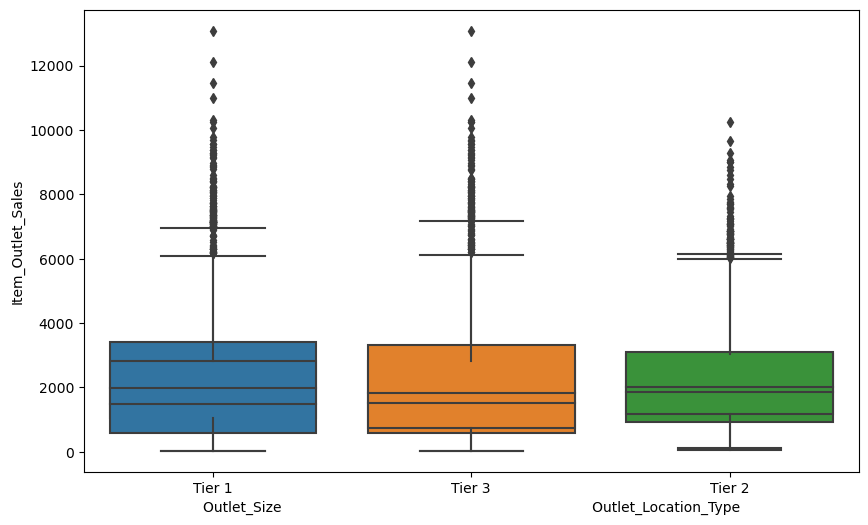

In [14]:
# Lets look at the columns Item_Visibility and Item_Fat_Content
plt.figure(figsize=(10, 6))

sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Outlet_Size'])
sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Outlet_Location_Type'])
plt.xlabel('Outlet_Size                                                                       Outlet_Location_Type')
plt.show()

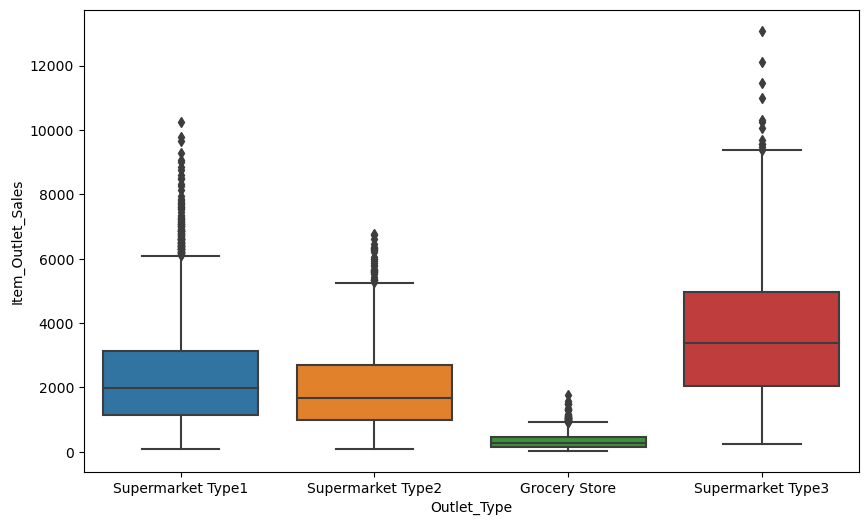

In [15]:
plt.figure(figsize=(10, 6))

sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Outlet_Type'])
plt.show()

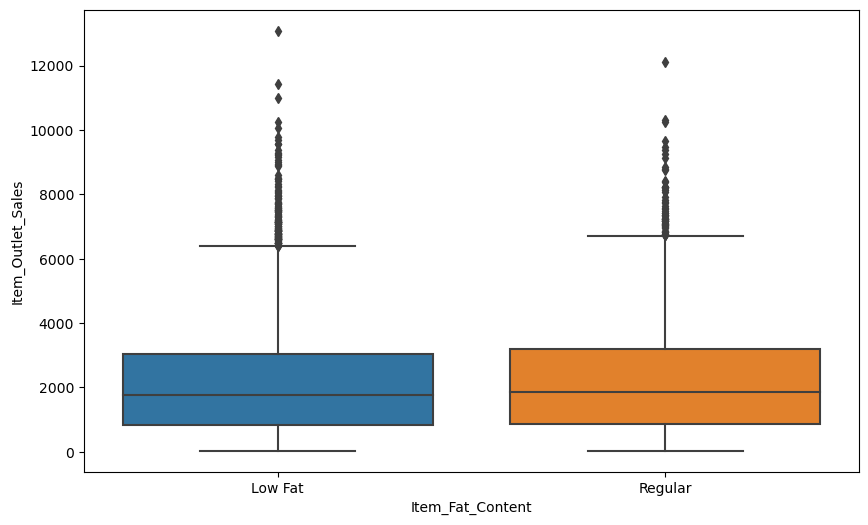

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(y = df['Item_Outlet_Sales'], x = df['Item_Fat_Content'])
plt.show()

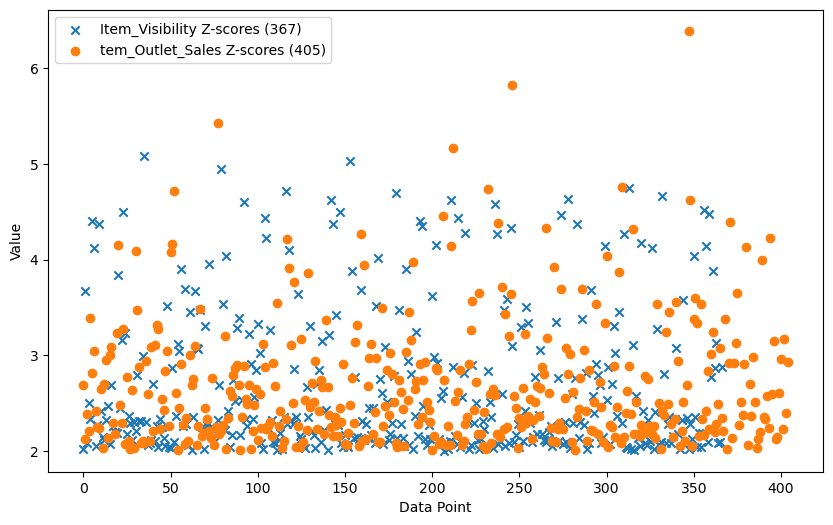

In [17]:
IV_zscore=st.zscore(df['Item_Visibility'])
IOS_zscore2=st.zscore(df['Item_Outlet_Sales'])
# Plot the original data
plt.figure(figsize=(10, 6))
IV_result = IV_zscore[(IV_zscore > 2) | (IV_zscore < -2)]
IOS_result2 = IOS_zscore2[(IOS_zscore2 > 2) | (IOS_zscore2 < -2)]
plt.scatter(range(len(IV_result)), IV_result, label=f'Item_Visibility Z-scores ({len(IV_result)})', marker='x')
plt.scatter(range(len(IOS_result2)), IOS_result2, label=f'tem_Outlet_Sales Z-scores ({len(IOS_result2)})', marker='o')
plt.xlabel('Data Point')
plt.ylabel('Value')
plt.legend()
plt.show()

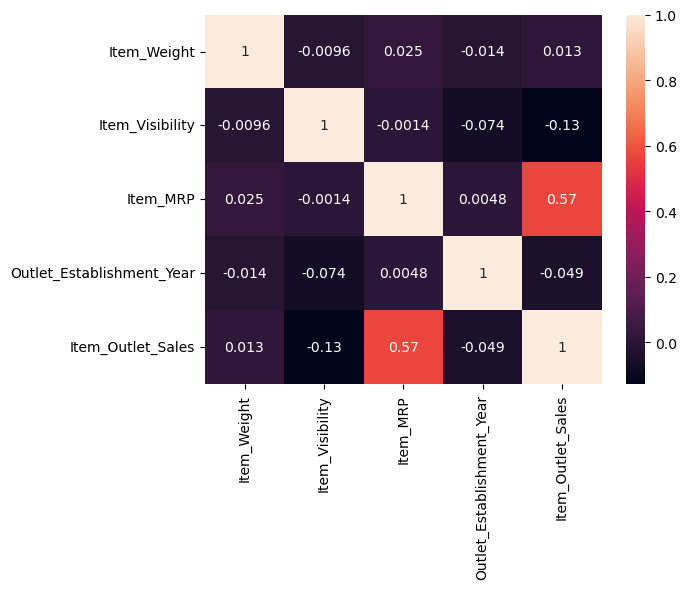

In [18]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

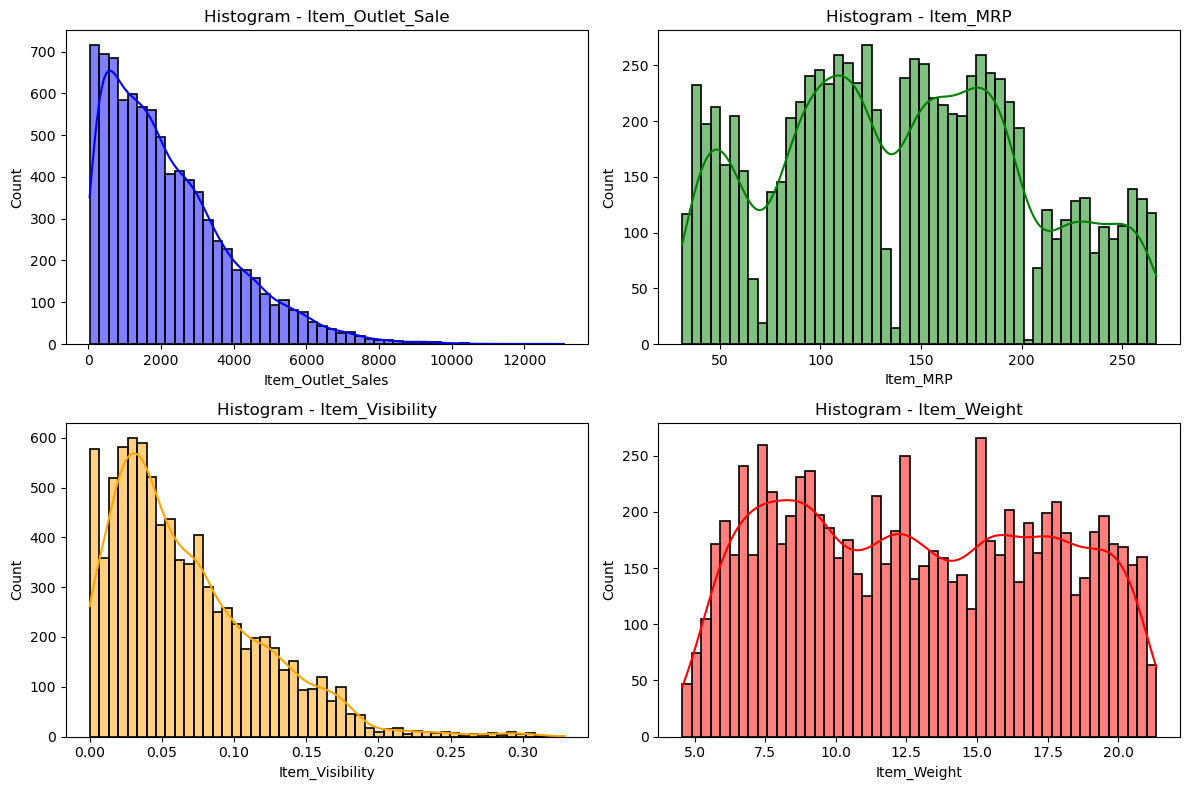

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot histograms with distribution lines for each column
sns.histplot(df['Item_Outlet_Sales'], bins=50, kde=True, ax=axes[0, 0], color='blue', edgecolor='black', linewidth=1.2)
axes[0, 0].set_title('Histogram - Item_Outlet_Sale')

sns.histplot(df['Item_MRP'], bins=50, kde=True, ax=axes[0, 1], color='green', edgecolor='black', linewidth=1.2)
axes[0, 1].set_title('Histogram - Item_MRP')

sns.histplot(df['Item_Visibility'], bins=50, kde=True, ax=axes[1, 0], color='orange', edgecolor='black', linewidth=1.2)
axes[1, 0].set_title('Histogram - Item_Visibility')

sns.histplot(df['Item_Weight'], bins=50, kde=True, ax=axes[1, 1], color='red', edgecolor='black', linewidth=1.2)
axes[1, 1].set_title('Histogram - Item_Weight')

plt.tight_layout()
plt.show()

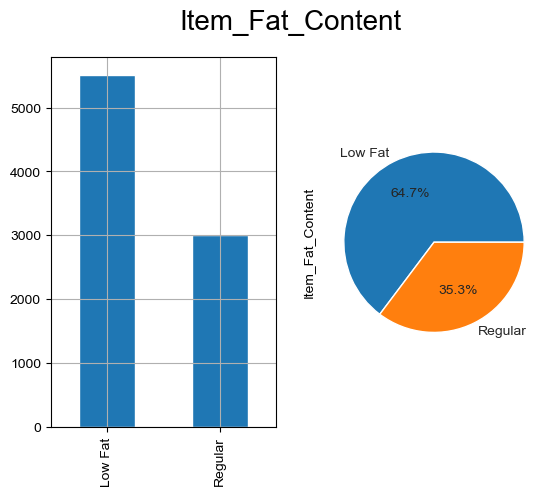

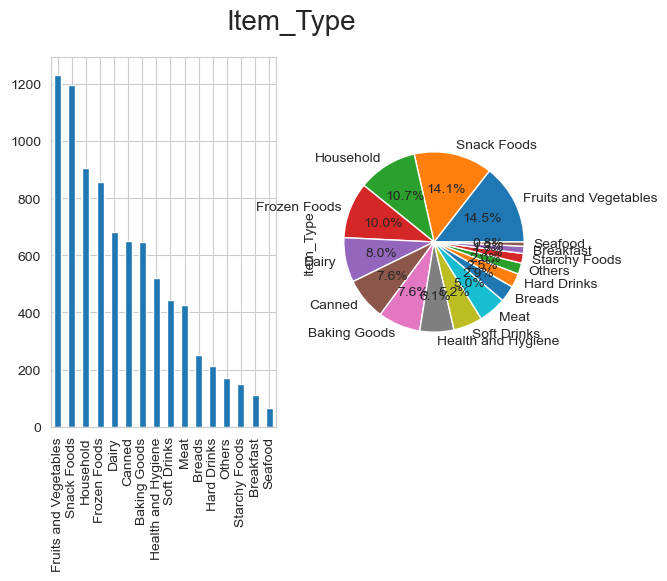

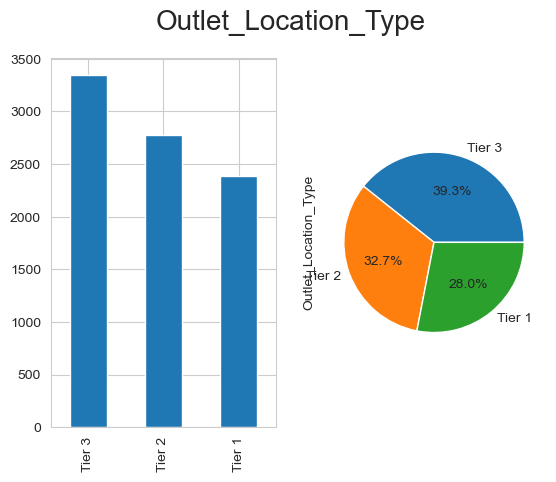

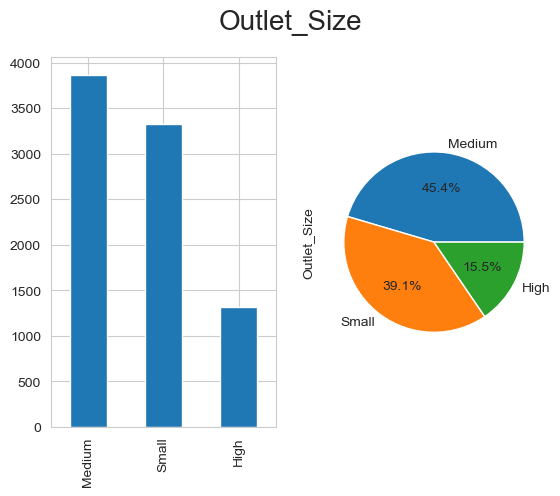

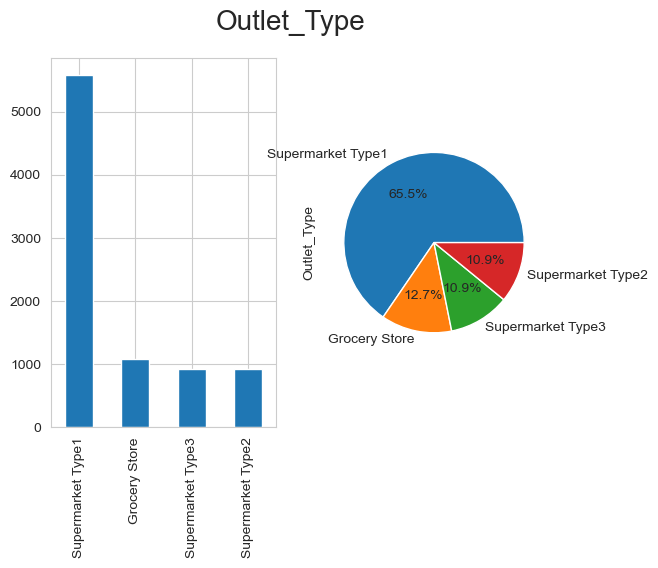

In [20]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].astype('category')

exclude_columns =['Item_Identifier','Outlet_Identifier']
categorical_columns = df.select_dtypes(include=['category']).columns.difference(exclude_columns)

for i in categorical_columns:

        fig, ax = plt.subplots(1, 2) 
        fig.suptitle( i , fontsize=20) 

        sns.set_style('whitegrid') 
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar')
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.1f%%")
        plt.show()

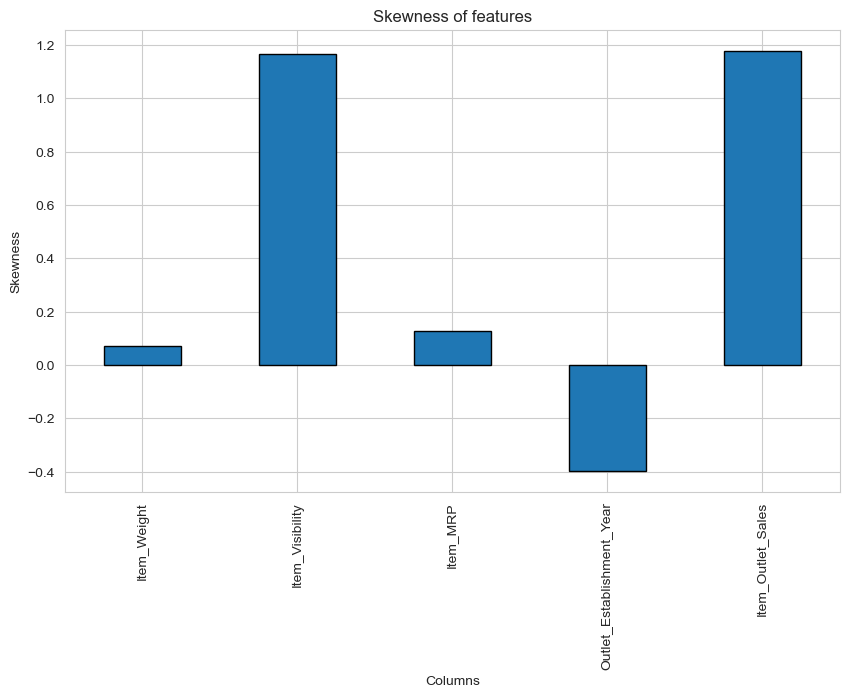

In [21]:
numeric_df=df.select_dtypes(include=np.number)
skewness = numeric_df.apply(lambda x: st.skew(x))

#Plot
plt.figure(figsize=(10, 6))
skewness.plot(kind='bar', edgecolor='black')
plt.title('Skewness of features')
plt.xlabel('Columns')
plt.ylabel('Skewness')
plt.show()

In [22]:
Null_visibility=len(np.where(df['Item_Visibility']==0)[0])
print(Null_visibility)

526


### Summary

- **Sales Analysis:**
  - Supermarkets have higher sales compared to grocery stores, but the size of the outlet doesn't directly correlate with sales.

- **Correlation Analysis:**
  - There is:
    1. A low correlation between visibility and sales.
    2. A high correlation between Item_MRP and sales.
    3. No significant correlation between sales and other numerical variables.

- **Outliers Detection:**
  - Boxplot visualizations and Z-scores indicate the presence of outliers in certain features.

- **Distribution Analysis:**
  - Item_Visibility and Item_Outlet_Sales distributions are highly skewed, as observed in histogram plots.

- **Data Integrity:**
  - There are 526 items with null visibility (6.2% of the dataset).
